In [3]:
import numpy as np
import matplotlib.pyplot as plt


In [4]:
def load_and_process_csv(file_path):
    data = np.loadtxt(file_path, delimiter=',', skiprows=2)
    if data.shape[1] < 2:
        raise ValueError(f"Data in {file_path} must have at least two columns for 2D plotting")
    return data

def load_acceptance_rate(file_path):
    acceptance_rate = np.loadtxt(file_path, delimiter=',', skiprows=1, max_rows=1)[0]
    return acceptance_rate

In [5]:
# Paths to the CSV files
csv_file_paths_hmc = ['HMC_data/HMC_samples_RB_10000.csv', 'HMC_data/HMC_samples_RB_50000.csv', 'HMC_data/HMC_samples_RB_100000.csv']  # Replace with your actual file paths

# Load and process each CSV file
HMC_data = [load_and_process_csv(file_path) for file_path in csv_file_paths_hmc]
HMC_acceptance_rate = [load_acceptance_rate(file_path) for file_path in csv_file_paths_hmc]
# Paths to the CSV files
csv_file_paths_mh = ['MH_data/MH_samples_RB_10000.csv', 'MH_data/MH_samples_RB_50000.csv', 'MH_data/MH_samples_RB_100000.csv']  # Replace with your actual file paths

# Load and process each CSV file
MH_data = [load_and_process_csv(file_path) for file_path in csv_file_paths_mh]
MH_acceptance_rate = [load_acceptance_rate(file_path) for file_path in csv_file_paths_mh]



In [6]:
def rosenbrock(x):
    a = 1.0
    b = 100.0
    return np.exp(-((a - x[0])**2 + b * (x[1] - x[0]**2)**2))

In [7]:
def monte_carlo_integration(f, x_bounds, y_bounds, n_points=1000000):
    x_min, x_max = x_bounds
    y_min, y_max = y_bounds

    # Generate random points within the specified bounds
    x_random = np.random.uniform(x_min, x_max, n_points)
    y_random = np.random.uniform(y_min, y_max, n_points)

    # Evaluate the function at these random points
    values = np.array([f([x, y]) for x, y in zip(x_random, y_random)])
    
    # Compute the area of the integration region
    area = (x_max - x_min) * (y_max - y_min)
    
    # Estimate the integral
    integral = area * np.mean(values)
    
    return integral



In [47]:
# Define the bounds for integration
x_bounds_tail = (2,100)  # Assuming some reasonable upper limit for x
y_bounds_tail = (3,100)  # Assuming some reasonable upper limit for y

# Perform the integration
integral_result_tail = monte_carlo_integration(rosenbrock, x_bounds_tail, y_bounds_tail, n_points=10000000)



# Define the bounds for integration
x_bounds = (-200, 200)  # Assuming some reasonable upper limit for x
y_bounds = (-200, 200)  # Assuming some reasonable upper limit for y

# Perform the integration
integral_result = monte_carlo_integration(rosenbrock, x_bounds, y_bounds,n_points=40000000)

print(integral_result_tail/integral_result)


0.07776892444476262


In [48]:
# Define the criteria
x_criteria = 2
y_criteria = 3

# Count the points in the tails
points_in_tails_HMC = np.sum((HMC_data[2][:, 0] > x_criteria) & (HMC_data[2][:, 1] > y_criteria))


# Get the total number of points
total_points = HMC_data[2].shape[0]

# Calculate the ratio
ratio_in_tails_HMC = points_in_tails_HMC / total_points

ratio_in_tails_HMC

0.08482

In [49]:
# Define the criteria
x_criteria = 2
y_criteria = 3

# Count the points in the tails
points_in_tails_MH = np.sum((MH_data[2][:, 0] > x_criteria) & (MH_data[2][:, 1] > y_criteria))


# Get the total number of points
total_points = MH_data[2].shape[0]

# Calculate the ratio
ratio_in_tails = points_in_tails_MH / total_points

ratio_in_tails

0.04766

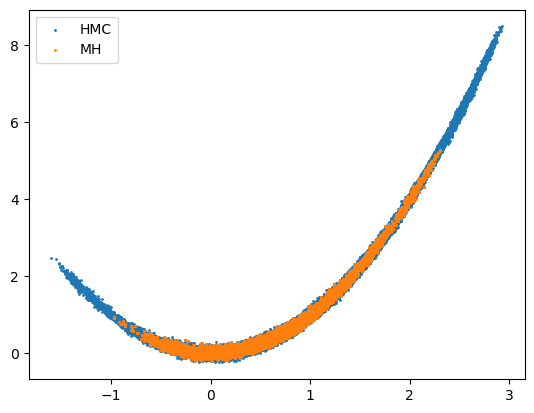

In [50]:
plt.scatter(HMC_data[2][:, 0], HMC_data[2][:, 1], s=1,label='HMC')
plt.scatter(MH_data[2][:, 0], MH_data[2][:, 1], s=1,label='MH')
plt.legend()
plt.show()

In [77]:
# Define the bounds for integration
x_bounds_tail = (-100,-0.5)  # Assuming some reasonable upper limit for x
y_bounds_tail = (0,100)  # Assuming some reasonable upper limit for y

# Perform the integration
integral_result_tail = monte_carlo_integration(rosenbrock, x_bounds_tail, y_bounds_tail, n_points=10000000)



# Define the bounds for integration
x_bounds = (-200, 200)  # Assuming some reasonable upper limit for x
y_bounds = (-200, 200)  # Assuming some reasonable upper limit for y

# Perform the integration
integral_result = monte_carlo_integration(rosenbrock, x_bounds, y_bounds,n_points=40000000)

print(integral_result_tail/integral_result)

0.015359715921744352


In [78]:
# Define the criteria
x_criteria = -0.5
y_criteria = 0

# Count the points in the tails
points_in_tails_HMC = np.sum((HMC_data[2][:, 0] < x_criteria) & (HMC_data[2][:, 1] > y_criteria))


# Get the total number of points
total_points = HMC_data[2].shape[0]

# Calculate the ratio
ratio_in_tails_HMC = points_in_tails_HMC / total_points

ratio_in_tails_HMC

0.01825

In [79]:
# Define the criteria
x_criteria = -0.5
y_criteria = 0

# Count the points in the tails
points_in_tails_MH = np.sum((MH_data[2][:, 0] < x_criteria) & (MH_data[2][:, 1] > y_criteria))


# Get the total number of points
total_points = MH_data[2].shape[0]

# Calculate the ratio
ratio_in_tails = points_in_tails_MH / total_points

ratio_in_tails

0.016